# Problem Set 3

**Task**: The problem set comprises one point only:

  1.  Use NumPy & SciPy to implement an algorithm that tests for the presence of
homophily in networks ― i.e., the extent to which present ties involve
homogeneous nodes

**Context**: As you work on the problem, keep the below in mind:


-   both real and synthetic network datasets could be used to show the functioning of the algorithm;
-   irrespective of the nature of the data (real or synthetic), I suggest:
    +   to focus on one attribute of nodes (being age, gender, ethnicity, or some preference);
    +   to consider a one-mode, non-directed, and unweighted network.



# Task
  1.  Use NumPy & SciPy to implement an algorithm that tests for the presence of
homophily in networks ― i.e., the extent to which present ties involve
homogeneous nodes


The no-homophily hypothesis implies what follows:  
- $pr(e_{ij} \ | \ i = m, \ j = m) = p * p$
- $pr(e_{ij} \ | \ i = f, \ j = f) = q * q$
- $pr(e_{ij} \ | \ i = m, \ j = f) = p * q$
- $pr(e_{ij} \ | \ i = f, \ j = m) = q * p$  

If the proportion of male-female ties deviates from $2*(p*q)$, then there is evidence of homophily in the network.

# Import relevant libraries

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Generate fake male-female data

In [2]:
# set seed
np.random.seed(7)

# total number of nodes
num_nodes = 50

# percentage male - female
male_percent = 0.5
num_male_nodes = int(num_nodes * male_percent)

num_female_nodes = num_nodes - num_male_nodes

# generate nodes
male_nodes = ['M' + str(x) for x in np.linspace(0, num_male_nodes-1, num = num_male_nodes).astype(int)]
female_nodes = ['F' + str(x) for x in np.linspace(0, num_male_nodes-1, num = num_male_nodes).astype(int)]
node_list = []
node_list.extend(male_nodes + female_nodes)

# generate edge probs
male_male = 0.40
female_female = 0.45
male_female = 0.15

# generate edges
num_edges = 100
male_male_edges = []
female_female_edges = []
male_female_edges = []

# male_male
while len(male_male_edges) < num_edges * male_male:
    to_append = tuple(np.random.choice(male_nodes, size = 2, replace = False))
    if (to_append not in male_male_edges) & (to_append[::-1] not in male_male_edges):
        male_male_edges.append(to_append)
# female_female        
while len(female_female_edges) < num_edges * female_female:
    to_append = tuple(np.random.choice(female_nodes, size = 2, replace = False))
    if (to_append not in female_female_edges) & (to_append[::-1] not in female_female_edges):
        female_female_edges.append(to_append)
# male_female
while len(male_female_edges) < num_edges * male_female:
    to_append = tuple(np.append(np.random.choice(male_nodes, size = 1), np.random.choice(female_nodes, size = 1)))
    if (to_append not in male_female_edges) & (to_append[::-1] not in male_female_edges):
        male_female_edges.append(to_append)
        
# get all edges
edge_list = []
edge_list.extend(male_male_edges + female_female_edges + male_female_edges)

# Graph Generator (Visualization)

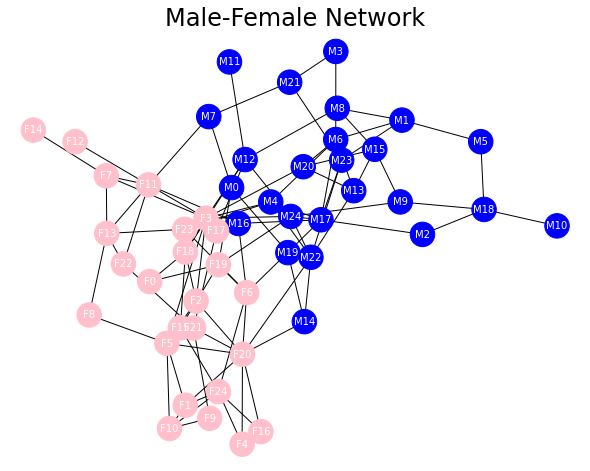

In [3]:
# initialize a new graph object
G = nx.Graph()

# populate the graph with nodes
G.add_nodes_from(node_list)

# populate the graph with edges
G.add_edges_from(edge_list)

# plot decoration
# map the color of each node with its community
colors = ['blue', 'pink']
color_map = []
# loop over nodes in G
for node in G:
    if node in male_nodes:
        color_map.append(colors[0])
    else:
        color_map.append(colors[1])

options = {
    'node_color': color_map,
    'node_size': 600,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_size': 10,
    'font_color': 'white'}

# set graph pattern
pos = nx.spiral_layout(G)
    
#set graph size
plt.figure(figsize=(8, 6)) 

# draw the network
nx.draw(G, **options)

# title of the plot
plt.title("Male-Female Network", fontsize=24)

# show the plot
plt.show()

# Homophily Test
No Homophily hypothesis: If the proportion of male-female ties deviates from $2*(p*q)$, then there is evidence of homophily in the network.

In [4]:
# Given p = proportion of male; q = proportion of female
p = len(male_nodes) / len(node_list)
q = len(female_nodes) / len(node_list)
baseline = 2 * p * q

In [5]:
def calculate_male_female_prop(G):
    # number of male-female tie
    num_male_female_tie = 0
    for edge in G.edges:
        # if the tie is between male-female; +1
        if (re.findall(r'[A-Z]', edge[0]) != re.findall(r'[A-Z]', edge[1])):
            num_male_female_tie = num_male_female_tie + 1

    # proportion of male-female tie
    male_female_prop = num_male_female_tie / len(G.edges)
    return male_female_prop

model_male_female_prop = calculate_male_female_prop(G)

check whether `model_male_female_prop` is significantly different from `baseline`( $2*(p*q)$)

In [6]:
# simulate 5000 random networks with the same proportion to get 
# mean and standard deviation of `male_female_prop` for random case

def random_male_female_prop(num_nodes, male_percent):

    # percentage male - female

    num_male_nodes = int(num_nodes * male_percent)

    num_female_nodes = num_nodes - num_male_nodes

    # generate nodes
    male_nodes = ['M' + str(x) for x in np.linspace(0, num_male_nodes-1, num = num_male_nodes).astype(int)]
    female_nodes = ['F' + str(x) for x in np.linspace(0, num_male_nodes-1, num = num_male_nodes).astype(int)]
    node_list = []
    node_list.extend(male_nodes + female_nodes)

    num_edges = 100
    edge_list = []

    while len(edge_list) < num_edges:
        to_append = tuple(np.random.choice(node_list, size = 2, replace = False))
        if (to_append not in edge_list) & (to_append[::-1] not in edge_list):
            edge_list.append(to_append)

    # initialize a new graph object
    G = nx.Graph()

    # populate the graph with nodes
    G.add_nodes_from(node_list)

    # populate the graph with edges
    G.add_edges_from(edge_list)

    prop = calculate_male_female_prop(G)
    
    return prop

props = []
for i in range(5000):
    props.append(random_male_female_prop(num_nodes, male_percent))

In [7]:
mean, stdev = np.mean(props), np.std(props)
print("mean: {}\nstdev: {}".format(mean, stdev))

mean: 0.509466
stdev: 0.04851736641657295


In [8]:
# check if the model prop is significantly different from the baseline (randomly distributed network)
def check_95ci(prop, stdev):
    # null hypothesis: 
    lower_bound = baseline - 1.96 * stdev
    upper_bound = baseline + 1.96 * stdev
    if (prop > lower_bound) & (prop < upper_bound):
        print("No presence of homophily!")
    elif prop <= lower_bound:
        print("Homophily is observed!")

check_95ci(model_male_female_prop, stdev)

Homophily is observed!
